# Домашнее задание 2
## На курсе Анализ данных в Python (Социология)
### Темы: предобработка данных для модели, линейная регрессия, регуляризация, оптимизация гиперпараметров, классификация и логистическая регрессия, SGD

**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Если вопрос задается конкретно, то предполагается, что вы дадите комментарии.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

это позволит обеспечить воспроизводимость результатов. При отсутствии фиксации мы каждый раз получали бы новый набор рандомных данных, и при запуске кода мы бы получали разные результаты. При фиксации мы работаем с одинаковым набором данных, что позволит нам изменять и совершенствовать сам код, без дополнительного внимания к тому, какой набор данных в нем присутствует. Фиксация кода обеспечивает уверенность в его совершенствовании тем, что мы будем наблюдать за самой моделью, а не за её изменениями в силу каждый раз использования ею разных данных. Разница в коде будет обусловлена самой моделью, а не данными.


# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков
- Визуализации признаков и их анализ


## **Простейший EDA и обработка признаков (4.5 балла)**

In [41]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)


Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (1.65 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


In [3]:
# your code here
random = df_train.sample(n=10, random_state=42)

# 10 Случайных строк тренировочного датасета 
print(f'10 Случайных строк в тренировочном датасете: {random}')


10 Случайных строк в тренировочном датасете:                                         name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6

In [4]:
# Первые 5 строк тестового датасета 
print(f'Первые 5 строк датасета: {df_test.head(5)}')

Первые 5 строк датасета:                                      name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-220

In [5]:
# Последние 5 строк тестового датасета
print(f'Последние 5 строк датасета: {df_test.tail(5)}')

Последние 5 строк датасета:                                  name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                

In [6]:
# Посмотрим пропуски в тренировочном датасете: 
missing_train = df_train.isnull().sum()
print(missing_train)


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64


Пропущенные значения в тренировочном датасете встречаются в следующих столбцах: mileage, engine, max_power, torque, seats. 

In [7]:
# Определим тип этих переменных: 

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


На данном этапе мы видим, что переменные, по которым далее мы установим наличие пропусков (mileage, engine, max_power, torque) являются типом object. Лишь одна переменная, по которой мы установим наличие пропусков (seats), имеет тип float. Пропуски по первой группе переменных мы заменим пустыми строками, а пропуски по seats мы заменим в действительно медианой, как указано в задании. 

In [8]:
# Посмотрим пропуски в тестовом датасете: 
missing_test = df_test.isnull().sum()
print(missing_test)

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64


In [9]:
# Посмотрим на явные дубликаты в тренировочном датасете - их 985: 
duplicates_train = df_train.duplicated().sum()
print(duplicates_train)

# Посмотрим на явные дубликаты в тестовом датасете - их 62: 
duplicates_test = df_test.duplicated().sum()
print(duplicates_test)

985
62


Пропущенные значения в тестовом датасете встречаются в следующих столбцах: mileage, engine, max_power, torque, seats. 

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [10]:
# your code here
from sklearn import impute
# Заполним пропуски в тренировочном наборе данных: 

cat_features_mask = (df_train.dtypes == "object").values

X_train = df_train[df_train.columns[~cat_features_mask]]
mis_replacer = impute.SimpleImputer(strategy="median")
X_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(X_train), columns=X_train.columns)

X_cat_train = df_train[df_train.columns[cat_features_mask]].fillna("")
X_cat_train.reset_index(drop=True, inplace=True)

X_no_mis = pd.concat([X_no_mis_real, X_cat_train], axis=1)

In [11]:
X_no_mis_real.shape, X_cat_train.shape, X_no_mis.shape

((6999, 4), (6999, 9), (6999, 13))

Проверим то, насколько мы действительно избавились от пропусков:

In [73]:
# Проверка для вещественнозначных признаков, где пропуски заполнялись медианой: 
check_1 = X_no_mis_real.isnull().sum()
print(check_1)

year             0
selling_price    0
km_driven        0
seats            0
dtype: int64


In [74]:
# Проверка для категориальных признаков, где пропуски заполнялись пустыми строками: 
check_2 = X_cat_train.isnull().sum()
print(check_2)

name            0
fuel            0
seller_type     0
transmission    0
owner           0
mileage         0
engine          0
max_power       0
torque          0
dtype: int64


Заполним пропуски в тестовом наборе данных. для seats мы будем использовать медиану значения seats из тренировочной выборки, а по причине того, что иные столбцы с пропущенными значениями являются вещественными, их мы заполним также просто нулями


In [14]:
# Заполняем пропуски в тестовом наборе данных: 

median_seats = df_train['seats'].median()
X_test = df_test['seats'].fillna(median_seats)

# Заполнение пропусков в категориальных столбцах
X_cat_test = df_test[df_test.columns[cat_features_mask]].fillna("")
X_cat_test.reset_index(drop=True, inplace=True)

# Объединение обработанных столбцов
X_no_mis_test = pd.concat([X_test, X_cat_test], axis=1)


In [15]:
# Проверка для вещественнозначных признаков, где пропуски заполнялись медианой от тренировочного датасета: 
check_3 = X_test.isnull().sum()
print(check_3)

0


In [16]:
# Проверка для категориальных признаков, где пропуски заполнялись пустыми строками: 
check_4 = X_cat_test.isnull().sum()
print(check_4)

name            0
fuel            0
seller_type     0
transmission    0
owner           0
mileage         0
engine          0
max_power       0
torque          0
dtype: int64


### **Задание 2 (1.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [17]:
# Отобразим объекты с одинаковыми признаковыми описаниями: 

duplicates = df_train.duplicated(subset=df_train.columns.difference(['selling_price']))

duplicates_rows = df_train[duplicates]
print("Строки с дубликатами по признакам (исключая целевую переменную):")
print(duplicates_rows)

Строки с дубликатами по признакам (исключая целевую переменную):
                                          name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254 

In [18]:
# Укажем, сколько всего таких объектов: 

len(df_train[duplicates])

1159

In [19]:
# Удалим повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили 
# отличаются, то оставим первую строку по этому автомобилю

data_cleaned = df_train.drop_duplicates(subset=df_train.columns.difference(['selling_price']), keep='first')

print(data_cleaned)

                                   name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
6992            Hyundai Santro Xing GLS  2008         120000     191000   
6993  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
6994                  Hyundai i20 Magna  2013         320000     110000   
6995              Hyundai Verna CRDi SX  2007         135000     119000   
6996             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mileage  \
0     Diesel  Individual

In [20]:
assert data_cleaned.shape == (5840, 13)

In [21]:
# Обновим индексы таким образом, чтобы они шли от нуля и без пропусков 
data_cleaned.reset_index(drop=True, inplace=True)

data_cleaned.tail()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
5839,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0


Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.75 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [22]:
# your code here

# Уберем единцы измерения для признака mileage из тренировочного и тестового массивов: 
# Сначала посмотрим, как выглядят эти значения: из них видно, что у каждого элемента в конце есть буквенное значение " kmpl",
# которое и необходимо убрать 

data_cleaned['mileage'].unique()

array(['23.4 kmpl', '21.14 kmpl', '23.0 kmpl', '16.1 kmpl', '20.14 kmpl',
       '17.3 km/kg', '23.59 kmpl', '20.0 kmpl', '19.01 kmpl', '17.3 kmpl',
       '19.3 kmpl', nan, '18.9 kmpl', '18.15 kmpl', '19.7 kmpl',
       '22.54 kmpl', '21.0 kmpl', '25.5 kmpl', '26.59 kmpl', '21.5 kmpl',
       '21.4 kmpl', '24.7 kmpl', '18.2 kmpl', '16.8 kmpl', '24.3 kmpl',
       '14.0 kmpl', '33.44 km/kg', '23.95 kmpl', '17.0 kmpl',
       '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '12.55 kmpl',
       '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl', '27.3 kmpl',
       '11.36 kmpl', '17.68 kmpl', '18.53 kmpl', '14.84 kmpl',
       '21.12 kmpl', '20.36 kmpl', '21.27 kmpl', '18.16 kmpl',
       '22.0 kmpl', '25.1 kmpl', '20.51 kmpl', '21.66 kmpl', '25.2 kmpl',
       '22.9 kmpl', '16.02 kmpl', '20.54 kmpl', '22.77 kmpl',
       '15.71 kmpl', '23.1 kmpl', '19.02 kmpl', '19.81 kmpl',
       '26.2 km/kg', '16.47 kmpl', '15.04 kmpl', '18.5 kmpl', '19.1 kmpl',
       '21.79 kmpl', '18.8 kmpl

In [54]:
# Переводим mileage в тип float: 
import re
def convert_mileage(value):
    if pd.isna(value):  
        return value
    
    numeric_part = ''.join(filter(lambda x: x.isdigit() or x == '.', value))
    return float(numeric_part)

data_cleaned['mileage_float'] = data_cleaned['mileage'].apply(convert_mileage)   

In [53]:
# Делаем то же самое на тестовой выборке: 

df_test['mileage_float'] = df_test['mileage'].apply(convert_mileage)

In [25]:
data_cleaned['engine'].unique()

array(['1248 CC', '1498 CC', '1396 CC', '1298 CC', '1197 CC', '1061 CC',
       '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC', nan,
       '1198 CC', '998 CC', '1591 CC', '2179 CC', '1368 CC', '1497 CC',
       '2982 CC', '2494 CC', '2143 CC', '2477 CC', '2755 CC', '1968 CC',
       '1196 CC', '1373 CC', '1598 CC', '1998 CC', '1086 CC', '1194 CC',
       '1798 CC', '1405 CC', '1582 CC', '999 CC', '2487 CC', '1999 CC',
       '2987 CC', '1995 CC', '1451 CC', '1969 CC', '2967 CC', '2497 CC',
       '1797 CC', '1991 CC', '2362 CC', '1493 CC', '1341 CC', '1199 CC',
       '1794 CC', '1193 CC', '2696 CC', '799 CC', '1495 CC', '1186 CC',
       '1047 CC', '2498 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC',
       '1984 CC', '2354 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '814 CC', '1997 CC', '1948 CC', '2997 CC', '1172 CC', '2489 CC',
       '2499 CC', '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC',
       '1462 CC', '2956 CC', '1527 CC', '2199 CC', '995 CC', '1599

In [26]:
# Преобразуем переменную engine: 

import re
def convert_engine(value):
    if pd.isna(value):  
        return value
    
    numeric_part = ''.join(filter(lambda x: x.isdigit() or x == '.', value))
    return float(numeric_part)

data_cleaned['engine_num'] = data_cleaned['engine'].apply(convert_engine)


/var/folders/mv/z6tk4kf54qx9f5x637st2ykr0000gn/T/ipykernel_9695/2488972893.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['engine_num'] = data_cleaned['engine'].apply(convert_engine)


In [47]:
# Делаем то же самое на тестовой выборке: 

df_test['engine_num'] = df_test['engine'].apply(convert_engine)

In [28]:
data_cleaned['max_power'].unique()

array(['74 bhp', '103.52 bhp', '90 bhp', '88.2 bhp', '81.86 bhp',
       '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp', '108.45 bhp',
       '60 bhp', '73.9 bhp', nan, '67 bhp', '82 bhp', '46.3 bhp',
       '88.73 bhp', '64.1 bhp', '98.6 bhp', '88.8 bhp', '83.1 bhp',
       '47.3 bhp', '73.8 bhp', '34.2 bhp', '88.5 bhp', '35 bhp',
       '40.3 bhp', '121.3 bhp', '138.03 bhp', '160.77 bhp', '117.3 bhp',
       '116.3 bhp', '67.05 bhp', '168.5 bhp', '100 bhp', '120.7 bhp',
       '98.63 bhp', '175.56 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp',
       '187.74 bhp', '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp',
       '108.495 bhp', '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp',
       '189 bhp', '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp',
       '81.80 bhp', '120 bhp', '94.68 bhp', '160 bhp', '155 bhp',
       '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.14 bhp', '83.8 bhp',
       '126.2 bhp', '62.1 bhp', '86.7 bhp', '188 bhp', '214.56 bhp',
       '177 bhp', '148.31 bhp', 

In [29]:
# Преобразуем переменную max_power: 

import re
def clean_and_convert(value):
    if pd.isna(value):  
        return np.nan
    
    numeric_part = re.sub(r'[^0-9.]', '', value)
    if numeric_part == '':  
        return np.nan
    return float(numeric_part)

data_cleaned['max_power_float'] = data_cleaned['max_power'].apply(clean_and_convert)


/var/folders/mv/z6tk4kf54qx9f5x637st2ykr0000gn/T/ipykernel_9695/2814314720.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['max_power_float'] = data_cleaned['max_power'].apply(clean_and_convert)


In [51]:
# Делаем то же самое на тестовой выборке: 

df_test['max_power_float'] = df_test['max_power'].apply(clean_and_convert)

In [31]:
type(data_cleaned['mileage'])

pandas.core.series.Series

In [55]:
# И приведем эти данные к типу float: 

data_cleaned.loc[:, 'mileage_float'] = data_cleaned['mileage_float'].astype(float)
data_cleaned.loc[:, 'engine_num'] = data_cleaned['engine_num'].astype(float)
data_cleaned.loc[:, 'max_power_float'] = data_cleaned['max_power_float'].astype(float)

# И в тестовой выборке тоже: 
df_test.loc[:, 'mileage_float'] = df_test['mileage_float'].astype(float)
df_test.loc[:, 'engine_num'] = df_test['engine_num'].astype(float)
df_test.loc[:, 'max_power_float'] = df_test['max_power_float'].astype(float)

In [56]:
# И также удалим столбец torque: 
data_cleaned = data_cleaned.drop(columns=['torque'])
df_test = df_train.drop(columns=['torque'])

KeyError: "['torque'] not found in axis"

### **Задание 4 (0.3 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [57]:
# your code here

data_cleaned['engine_num'] = data_cleaned['engine_num'].replace("", np.nan)

median_value = data_cleaned['engine_num'].median()

data_cleaned['engine_num'] = data_cleaned['engine_num'].fillna(median_value)


In [58]:
data_cleaned['engine_num'] = data_cleaned['engine_num'].astype(int)
data_cleaned['engine_num']

0       1248
1       1498
2       1396
3       1298
4       1197
        ... 
5835    1086
5836     998
5837    1197
5838    1493
5839    1248
Name: engine_num, Length: 5840, dtype: int64

In [59]:
median_value_seats = data_cleaned['seats'].median()

data_cleaned['seats'] = data_cleaned['seats'].fillna(median_value_seats)
data_cleaned['seats'] = data_cleaned['seats'].astype(int)
data_cleaned['seats']

0       5
1       5
2       5
3       5
4       5
       ..
5835    5
5836    5
5837    5
5838    5
5839    5
Name: seats, Length: 5840, dtype: int64

In [60]:
# И в тестовой выборке: 
df_test['engine_num'] = df_test['engine_num'].fillna(median_value)
df_test['engine_num'] = df_test['engine_num'].astype(int)

df_test['seats'] = df_test['seats'].fillna(median_value_seats)
df_test['seats'] = df_test['seats'].astype(int)

### **Задание 5 (0.3 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [ ]:
# your code here
data_cleaned.describe()


,year,selling_price,km_driven,seats,mileage_float,engine_num,max_power_float
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5654.000000,5840.000000,5656.000000
mean,2013.428425,5.229601e+05,7.395224e+04,45.015411,19.432842,1429.448973,88.103070
std,4.095622,5.354320e+05,6.007114e+04,218.212786,4.051002,485.662834,32.131943
min,1983.000000,2.999900e+04,1.000000e+00,2.000000,0.000000,624.000000,0.000000
25%,2011.000000,2.500000e+05,3.900000e+04,5.000000,16.800000,1197.000000,68.000000
50%,2014.000000,4.050000e+05,7.000000e+04,5.000000,19.370000,1248.000000,81.860000
75%,2017.000000,6.400000e+05,1.000000e+05,5.000000,22.320000,1498.000000,100.000000
max,2020.000000,1.000000e+07,2.360457e+06,1248.000000,42.000000,3604.000000,400.000000


In [ ]:
df_test.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [ ]:
# Для категориальных столбцов:
data_cleaned.describe(include=['object'])

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [ ]:
# Для категориальных столбцов:
df_test.describe(include=['object'])

,name,fuel,seller_type,transmission,owner
count,6999,6999,6999,6999,6999
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,116,3793,5826,6095,4587


In [62]:
# Проверка того, что все сделали правильно

# Удалим предыдущие переменные, которые мы уже заменили: 

data_cleaned = data_cleaned.drop(columns=['mileage'])
df_test = df_test.drop(columns=['mileage'])

data_cleaned = data_cleaned.drop(columns=['engine'])
df_test = df_test.drop(columns=['engine'])

data_cleaned = data_cleaned.drop(columns=['max_power'])
df_test = df_test.drop(columns=['max_power'])

data_cleaned.shape

(5840, 12)

## **Визуализации (3 балла)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (1.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

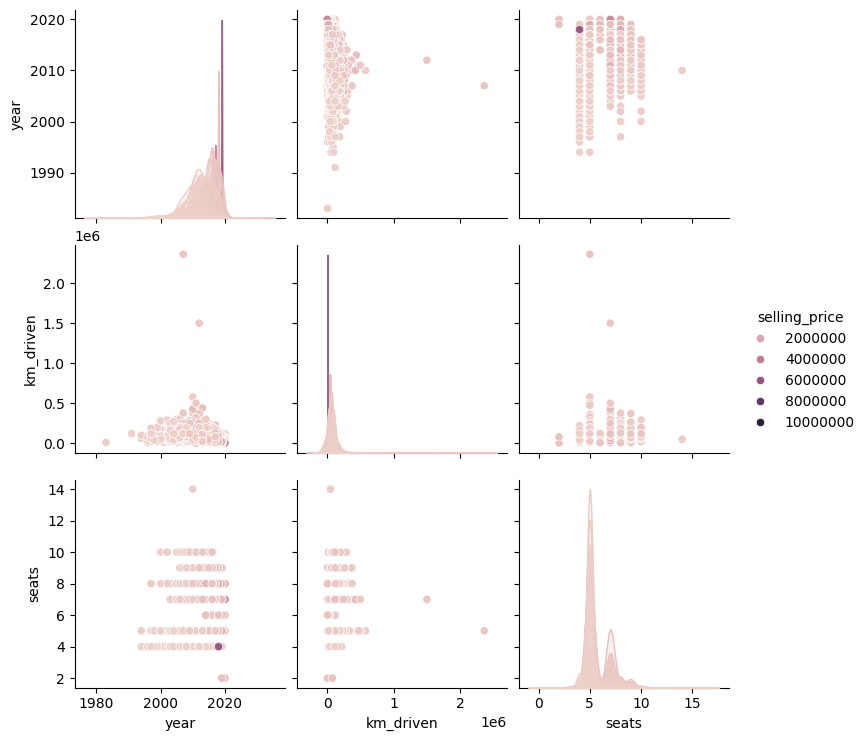

In [ ]:
# your code here
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df_train.select_dtypes(include=['number'])
sns.pairplot(numeric_columns, hue='selling_price')
plt.show()

По предложенным данным можно предположить о связи переменной selling_price с переменной seats. Также можно выдвинуть гипотезу о связи признака year с признаком km_driven.


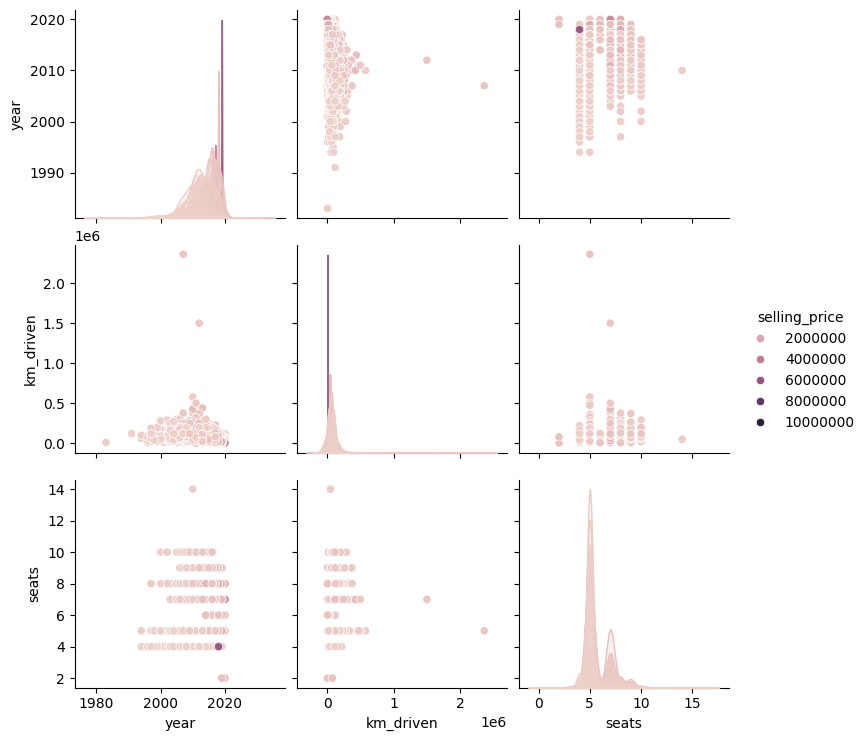

In [ ]:
# your code here
numeric_columns_test = df_test.select_dtypes(include=['number'])
a = sns.pairplot(numeric_columns_test, hue='selling_price')
a

В тестовых данных мы можем наблюдать большую вероятность взаимосвязи целнвой переменной и остальных переменных. В этих данных также тщетче видны зависимости между самими признаками. 

### **Задание 7 (1.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [ ]:
# your code here

data_cleaned
for_matrix = data_cleaned[['selling_price', 'seats', 'mileage_float', 'engine_num', 'max_power_float', 'year', 'km_driven']]
correlation_matrix =for_matrix.corr(method='pearson')


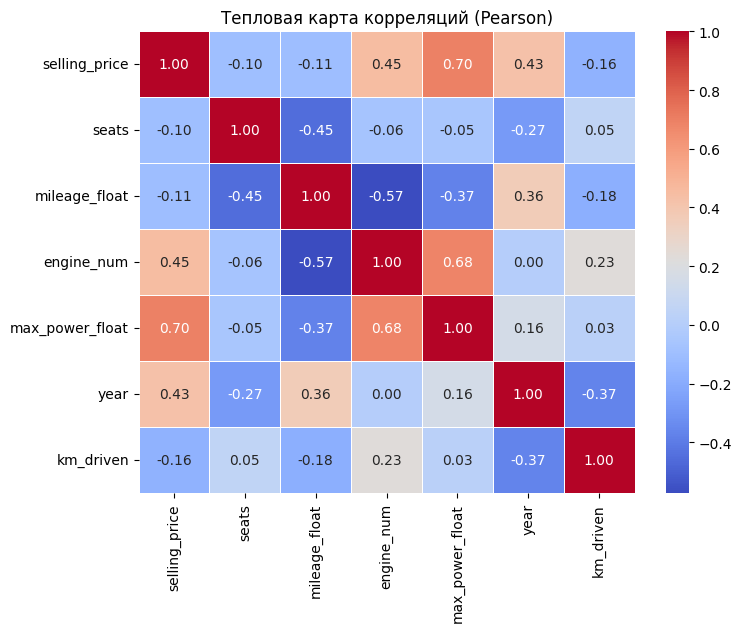

In [ ]:
# Тепловая карта: 
plt.figure(figsize=(8, 6)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Тепловая карта корреляций (Pearson)')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

(1) Наименее скоррелированы между собой: max_power_float и km_driven, так как модуль значения корреляции равен всего 0.03
(2) Да, это верно утверждать. Потому что корреляция между этими признаками значение корреляции отрицательное (-0.37), причем корреляция слабая 


# **Часть 2 | Модель только на вещественных признаках (6.25 балла)**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.


### **Задание 8 (0.25 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [70]:
copy_train = data_cleaned.copy()
copy_test = df_test.copy()

y_train = data_cleaned['selling_price']
X_train = data_cleaned[['seats', 'mileage_float', 'engine_num', 'max_power_float', 'year', 'km_driven']]

Ранее мы заполнили согласно заданию переменные mileage и max_power пустыми строками. Однако учитывая, что пустые значения можно заполнить медианой переменных, сделаем это для новых переменных в наборе:

In [81]:
median_mileage = X_train['mileage_float'].median()  
X_train['mileage_float'].fillna(median_mileage, inplace=True)

median_power = X_train['max_power_float'].median()  
X_train['max_power_float'].fillna(median_power, inplace=True)


X_test['mileage_float'].fillna(median_mileage, inplace=True)

 
X_test['max_power_float'].fillna(median_power, inplace=True)

/var/folders/mv/z6tk4kf54qx9f5x637st2ykr0000gn/T/ipykernel_9695/2935469700.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['mileage_float'].fillna(median_mileage, inplace=True)
/var/folders/mv/z6tk4kf54qx9f5x637st2ykr0000gn/T/ipykernel_9695/2935469700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['mileage_float'].fill

In [82]:
X_train.isna().sum()

seats              0
mileage_float      0
engine_num         0
max_power_float    0
year               0
km_driven          0
dtype: int64

In [83]:
X_test.isna().sum()

seats              0
mileage_float      0
engine_num         0
max_power_float    0
year               0
km_driven          0
dtype: int64

In [ ]:
X_train.shape #== (5840, 6), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

(5840, 6)

In [63]:
y_test = df_test['selling_price']
X_test = df_test[['seats', 'mileage_float', 'engine_num', 'max_power_float', 'year', 'km_driven']]

In [64]:
X_test.shape #== (1000, 6), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

(1000, 6)

### **Задание 9 (1 балл)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here

model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания на тренировочном и тестовом наборах:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Метрики качества для тренировочного набора:
r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

# Для тестового набора:
r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

# Вывод результатов
print("Метрики качества для тренировочного набора:")
print(f"R^2: {r2_train:.4f}")
print(f"MSE: {mse_train:.4f}")

print("\nМетрики качества для тестового набора:")
print(f"R^2: {r2_test:.4f}")
print(f"MSE: {mse_test:.4f}")




Метрики качества для тренировочного набора:
R^2: 0.5923
MSE: 116874153930.0289

Метрики качества для тестового набора:
R^2: 0.5941
MSE: 233298779730.4529


Выводы: 
Порядка 59% целевой переменной объясняется регрессионной моделью, это достаточно хороший показатель. Аналогично и в тестовом наборе. 
Значения R2 почти идентичны для тренировочного набора и для тестового набора, что позволяет сказать, что модель не переобучена и дает хорошо обобщенные данные. 

Говоря про MSE, можно отметить, что для тестового набора она в два и более раз выше. Это может говорить о переобучении модели. 


### **Задание 10 (0.75 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [95]:
from sklearn.preprocessing import StandardScaler
# Делаем стандартизацию
scaler = StandardScaler()  # Создаем объект StandardScaler:
X_train_scaled = scaler.fit_transform(X_train)

# Применяем стандартизацию к тестовым данным:
X_test_scaled = scaler.transform(X_test)

# Обучаем модель линейной регрессии на стандартизированных данных:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Делаем предсказания на тренировочном и тестовом наборах:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)
# Для тестового набора
r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

# Результаты:
print("Метрики качества для тренировочного набора:")
print(f"R^2: {r2_train:.4f}")
print(f"MSE: {mse_train:.4f}")

print("\nМетрики качества для тестового набора:")
print(f"R^2: {r2_test:.4f}")
print(f"MSE: {mse_test:.4f}")
# your code here

Метрики качества для тренировочного набора:
R^2: 0.5923
MSE: 116874153930.0289

Метрики качества для тестового набора:
R^2: 0.5941
MSE: 233298779730.4498


Для тренировочного набора у нас остались прежними R2 и MSE. При этом для тестового набора совсем немного поменялся MSE. 

### **Задание 11 (0.5 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [ ]:
# your code here
coefficients = model.coef_
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

feature_importance['Absolute_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

print("Важность признаков (по модулю коэффициентов):")
print(feature_importance)

most_important_feature = feature_importance.iloc[0]['Feature']
print(f"\nНаиболее информативный признак: {most_important_feature}")

Важность признаков (по модулю коэффициентов):
           Feature    Coefficient  Absolute_Coefficient
3  max_power_float  322807.353259         322807.353259
4             year  152772.570846         152772.570846
2       engine_num   61178.494337          61178.494337
5        km_driven  -44158.818520          44158.818520
1    mileage_float   28833.925778          28833.925778
0            seats  -23209.132486          23209.132486

Наиболее информативный признак: max_power_float


### **Задание 12 (1.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)  # alpha - параметр регуляризации (по умолчанию 1.0)
lasso_model.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)

r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
mse_train_lasso = MSE(y_train, y_train_pred_lasso)

r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
mse_test_lasso = MSE(y_test, y_test_pred_lasso)

print("Метрики качества для тренировочного набора (Lasso):")
print(f"R^2: {r2_train_lasso:.4f}")
print(f"MSE: {mse_train_lasso:.4f}")

print("\nМетрики качества для тестового набора (Lasso):")
print(f"R^2: {r2_test_lasso:.4f}")
print(f"MSE: {mse_test_lasso:.4f}")

# your code here

Метрики качества для тренировочного набора (Lasso):
R^2: 0.5923
MSE: 116874153937.4863

Метрики качества для тестового набора (Lasso):
R^2: 0.5941
MSE: 233299421201.2669


In [104]:
# your code here
# Проверяем, занулила ли Lasso какие-нибудь веса
coefficients = lasso_model.coef_
zero_coefficients = [feature for feature, coef in zip(X_train.columns, coefficients) if coef == 0]

print("\nКоэффициенты модели Lasso:")
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef:.4f}")

print("\nПризнаки с зануленными коэффициентами:")
print(zero_coefficients)

if len(zero_coefficients) > 0:
    print("\nLasso занулила коэффициенты для следующих признаков:", zero_coefficients)
    print("Это может быть связано с тем, что эти признаки незначимы для предсказания целевой переменной.")
else:
    print("\nLasso не занулила коэффициенты.")
    print("Это может быть связано с тем, что все признаки имеют значимое влияние на целевую переменную.")


Коэффициенты модели Lasso:
seats: -23206.5778
mileage_float: 28832.6758
engine_num: 61174.5197
max_power_float: 322808.0333
year: 152772.1526
km_driven: -44157.7953

Признаки с зануленными коэффициентами:
[]

Lasso не занулила коэффициенты.
Это может быть связано с тем, что все признаки имеют значимое влияние на целевую переменную.


### **Задание 13 Финальный рывок (2.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [108]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100] 
}

lasso_model = Lasso()
grid_search = GridSearchCV(lasso_model, param_grid, cv=10, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)


best_lasso_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']


y_train_pred_best_lasso = best_lasso_model.predict(X_train_scaled)
y_test_pred_best_lasso = best_lasso_model.predict(X_test_scaled)


r2_train_best_lasso = r2_score(y_train, y_train_pred_best_lasso)
mse_train_best_lasso = MSE(y_train, y_train_pred_best_lasso)


r2_test_best_lasso = r2_score(y_test, y_test_pred_best_lasso)
mse_test_best_lasso = MSE(y_test, y_test_pred_best_lasso)


print("Метрики качества для тренировочного набора (Lasso, лучшая модель):")
print(f"R^2: {r2_train_best_lasso:.4f}")
print(f"MSE: {mse_train_best_lasso:.4f}")

print("\nМетрики качества для тестового набора (Lasso, лучшая модель):")
print(f"R^2: {r2_test_best_lasso:.4f}")
print(f"MSE: {mse_test_best_lasso:.4f}")

print("\nЛучший параметр alpha:", best_alpha)

# your code here

Метрики качества для тренировочного набора (Lasso, лучшая модель):
R^2: 0.5923
MSE: 116874240016.2721

Метрики качества для тестового набора (Lasso, лучшая модель):
R^2: 0.5940
MSE: 233364384949.0782

Лучший параметр alpha: 100


In [110]:
# your code here

coefficients = best_lasso_model.coef_
zero_coefficients = [feature for feature, coef in zip(X_train.columns, coefficients) if coef == 0]

print("\nКоэффициенты лучшей модели Lasso:")
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef:.4f}")

print("\nПризнаки с зануленными коэффициентами:")
print(zero_coefficients)

print("\nСколько моделей обучил GridSearchCV:", grid_search.n_splits_ * len(param_grid['alpha']))
print("Лучший коэффициент регуляризации (alpha):", best_alpha)

if len(zero_coefficients) > 0:
    print("Занулились ли какие-нибудь веса:", "Да")
    print("Признаки с зануленными коэффициентами:", zero_coefficients)
else:
    print("Занулились ли какие-нибудь веса:", "Нет")


Коэффициенты лучшей модели Lasso:
seats: -22941.6676
mileage_float: 28674.8892
engine_num: 60743.2551
max_power_float: 322881.7840
year: 152744.0666
km_driven: -44051.5619

Признаки с зануленными коэффициентами:
[]

Сколько моделей обучил GridSearchCV: 50
Лучший коэффициент регуляризации (alpha): 100
Занулились ли какие-нибудь веса: Нет


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [114]:
from sklearn.linear_model import ElasticNet
param_grid = {
    'alpha': [0.01, 0.1, 1, 10],  
    'l1_ratio': [0.1, 0.5, 0.9]  
}
elastic_net_model = ElasticNet()
grid_search = GridSearchCV(elastic_net_model, param_grid, cv=10, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)

best_elastic_net_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

y_train_pred_best_elastic_net = best_elastic_net_model.predict(X_train_scaled)
y_test_pred_best_elastic_net = best_elastic_net_model.predict(X_test_scaled)

r2_train_best_elastic_net = r2_score(y_train, y_train_pred_best_elastic_net)
mse_train_best_elastic_net = MSE(y_train, y_train_pred_best_elastic_net)

r2_test_best_elastic_net = r2_score(y_test, y_test_pred_best_elastic_net)
mse_test_best_elastic_net = MSE(y_test, y_test_pred_best_elastic_net)

print("Метрики качества для тренировочного набора (ElasticNet, лучшая модель):")
print(f"R^2: {r2_train_best_elastic_net:.4f}")
print(f"MSE: {mse_train_best_elastic_net:.4f}")

print("\nМетрики качества для тестового набора (ElasticNet, лучшая модель):")
print(f"R^2: {r2_test_best_elastic_net:.4f}")
print(f"MSE: {mse_test_best_elastic_net:.4f}")

print("\nЛучшие параметры:")
print(f"alpha: {best_alpha}")
print(f"l1_ratio: {best_l1_ratio}")

print("\nСколько моделей обучил GridSearchCV:", grid_search.n_splits_ * len(param_grid['alpha']) * len(param_grid['l1_ratio']))
print("Лучшие гиперпараметры:", grid_search.best_params_)
# your code here

Метрики качества для тренировочного набора (ElasticNet, лучшая модель):
R^2: 0.5922
MSE: 116889619165.8532

Метрики качества для тестового набора (ElasticNet, лучшая модель):
R^2: 0.5919
MSE: 234562588912.2074

Лучшие параметры:
alpha: 0.1
l1_ratio: 0.9

Сколько моделей обучил GridSearchCV: 120
Лучшие гиперпараметры: {'alpha': 0.1, 'l1_ratio': 0.9}


# **Часть 3| Добавляем категориальные фичи (3.75 балла)**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.


### **Задание 14 (0.5 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
1. Удалить столбец`name`
2. Снова объединить категориальные с вещественными признаками.

In [117]:
# your code here
data_cleaned = data_cleaned.drop(columns=['name'])

# Разделение признаков
categorical_features = data_cleaned.select_dtypes(include=['object']).columns.tolist()  # категориальные признаки
numeric_features = data_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()  # вещественные признаки

# Их объединение
combined_features = categorical_features + numeric_features

data_combined = data_cleaned[combined_features]

data_combined

,fuel,seller_type,transmission,owner,year,selling_price,km_driven,seats,mileage_float,engine_num,max_power_float
0,Diesel,Individual,Manual,First Owner,2014,450000,145500,5,23.40,1248,74.00
1,Diesel,Individual,Manual,Second Owner,2014,370000,120000,5,21.14,1498,103.52
2,Diesel,Individual,Manual,First Owner,2010,225000,127000,5,23.00,1396,90.00
3,Petrol,Individual,Manual,First Owner,2007,130000,120000,5,16.10,1298,88.20
4,Petrol,Individual,Manual,First Owner,2017,440000,45000,5,20.14,1197,81.86
...,...,...,...,...,...,...,...,...,...,...,...
5835,Petrol,Individual,Manual,First Owner,2008,120000,191000,5,17.92,1086,62.10
5836,Petrol,Individual,Manual,Second Owner,2013,260000,50000,5,18.90,998,67.10
5837,Petrol,Individual,Manual,First Owner,2013,320000,110000,5,18.50,1197,82.85
5838,Diesel,Individual,Manual,Fourth & Above Owner,2007,135000,119000,5,16.80,1493,110.00


### **Задание 15 (2 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [118]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

X_dum = pd.get_dummies(data_combined, drop_first=True)
print(X_dum.shape)
X_dum.head()
# your code here

(5840, 17)


,year,selling_price,km_driven,seats,mileage_float,engine_num,max_power_float,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,5,23.40,1248,74.00,True,False,False,True,False,True,False,False,False,False
1,2014,370000,120000,5,21.14,1498,103.52,True,False,False,True,False,True,False,True,False,False
2,2010,225000,127000,5,23.00,1396,90.00,True,False,False,True,False,True,False,False,False,False
3,2007,130000,120000,5,16.10,1298,88.20,False,False,True,True,False,True,False,False,False,False
4,2017,440000,45000,5,20.14,1197,81.86,False,False,True,True,False,True,False,False,False,False


### **Задание 16 (1.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [121]:
from sklearn.linear_model import Ridge
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  
}

ridge_model = Ridge()
grid_search = GridSearchCV(ridge_model, param_grid, cv=10, scoring='r2')

grid_search.fit(X_train_scaled, y_train)
best_ridge_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

y_train_pred_best_ridge = best_ridge_model.predict(X_train_scaled)
y_test_pred_best_ridge = best_ridge_model.predict(X_test_scaled)

r2_train_best_ridge = r2_score(y_train, y_train_pred_best_ridge)
mse_train_best_ridge = MSE(y_train, y_train_pred_best_ridge)

r2_test_best_ridge = r2_score(y_test, y_test_pred_best_ridge)
mse_test_best_ridge = MSE(y_test, y_test_pred_best_ridge)


print("Метрики качества для тренировочного набора (Ridge, лучшая модель):")
print(f"R^2: {r2_train_best_ridge:.4f}")
print(f"MSE: {mse_train_best_ridge:.4f}")

print("\nМетрики качества для тестового набора (Ridge, лучшая модель):")
print(f"R^2: {r2_test_best_ridge:.4f}")
print(f"MSE: {mse_test_best_ridge:.4f}")

print("\nЛучший параметр alpha:", best_alpha)

# your code here

Метрики качества для тренировочного набора (Ridge, лучшая модель):
R^2: 0.5921
MSE: 116918018731.7746

Метрики качества для тестового набора (Ridge, лучшая модель):
R^2: 0.5904
MSE: 235464192083.2854

Лучший параметр alpha: 100


Качество прогноза, к сожалению, улучшить не удалось.


# **Часть 4 (7 баллов) | Классификация**



In [122]:
%pylab inline
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/kurinaanastasiua/Desktop/4 курс/Python/myenv/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning:

pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy



In [123]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

### **Задание 13 (2 балла)**
Обучите логистическую регрессию на синтетических данных.

In [126]:
# your code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Точность (Accuracy):", accuracy)
print("\nМатрица ошибок (Confusion Matrix):\n", conf_matrix)
print("\nОтчет о классификации (Classification Report):\n", class_report)

Точность (Accuracy): 0.8486666666666667

Матрица ошибок (Confusion Matrix):
 [[12794  2244]
 [ 2296 12666]]

Отчет о классификации (Classification Report):
               precision    recall  f1-score   support

           0       0.85      0.85      0.85     15038
           1       0.85      0.85      0.85     14962

    accuracy                           0.85     30000
   macro avg       0.85      0.85      0.85     30000
weighted avg       0.85      0.85      0.85     30000



На тестовой части посчитайте ROC-AUC, PR-AUC. Самостоятельно изучите, что такое PR-AUC.

Постройте ROC и PR кривые. Проинтерпретируйте результат.

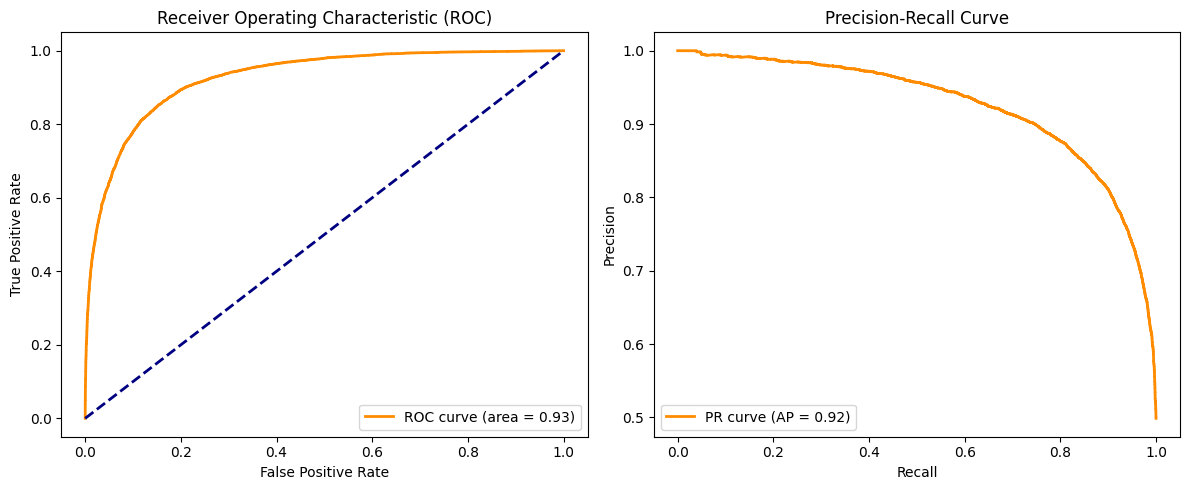

In [128]:
# your code here
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score


y_pred_proba = model.predict_proba(X_test)[:, 1]  


fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

Значения кривых ROC (0.93) и PR (0.92) позволяют сказать нам о достаточно высоком качестве модели. Первая кривая показывает то, насколько хорошо модель различает классы. Вторая кривая показывает точность и полноту предсказаний. 

### **Задание 14 (2 балла)**

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом для задания мы немного модифицируем датасет.

In [130]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Посчитайте качество (выведите все метрики классификации) на train и test при применении логистической регрессии.

In [131]:
# your code here

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)


model = LogisticRegression(max_iter=1000, random_state=124)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

# Вывод результатов
print("Метрики качества на тренировочной выборке:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-score: {train_f1:.4f}")
print("Confusion Matrix:\n", train_conf_matrix)
print("Classification Report:\n", train_class_report)

print("\nМетрики качества на тестовой выборке:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-score: {test_f1:.4f}")
print("Confusion Matrix:\n", test_conf_matrix)
print("Classification Report:\n", test_class_report)

/Users/kurinaanastasiua/Desktop/4 курс/Python/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/kurinaanastasiua/Desktop/4 курс/Python/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Метрики качества на тренировочной выборке:
Accuracy: 0.9635
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
Confusion Matrix:
 [[458796      0]
 [ 17373      0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    458796
           1       0.00      0.00      0.00     17373

    accuracy                           0.96    476169
   macro avg       0.48      0.50      0.49    476169
weighted avg       0.93      0.96      0.95    476169


Метрики качества на тестовой выборке:
Accuracy: 0.9637
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
Confusion Matrix:
 [[114722      0]
 [  4321      0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    114722
           1       0.00      0.00      0.00      4321

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      

/Users/kurinaanastasiua/Desktop/4 курс/Python/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/kurinaanastasiua/Desktop/4 курс/Python/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/kurinaanastasiua/Desktop/4 курс/Python/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/kurinaanastasiua/Desktop/4 курс/Python/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Prec

Показатели высокие, что говорит о хорошем качестве модели. На тестовой выборке Accuracy доходит до 0.96


### **Задание 15 (2 балла)**

Закодируйте все категориальные признаки с помощью one-hot-кодирования, а числовые признаки масштабируйте. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до предобработки). Измерьте время, потребовавшееся на обучение модели. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [133]:
# your code here
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Масштабирование числовых признаков
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # One-Hot-кодирование категориальных признаков
    ])


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Предобработка данных
    ('classifier', LogisticRegression(max_iter=1000, random_state=124))  # Логистическая регрессия
])


start_time = time.time()


pipeline.fit(X_train, y_train)

end_time = time.time()
training_time = end_time - start_time


y_test_pred = pipeline.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)


print("Время обучения модели:", training_time, "секунд")
print("\nМетрики качества на тестовой выборке:")
print(f"Accuracy: {test_accuracy:.4f}")
print("Confusion Matrix:\n", test_conf_matrix)
print("Classification Report:\n", test_class_report)


encoded_features = preprocessor.transform(X_train).shape[1]
print("\nКоличество признаков после кодирования:", encoded_features)

/Users/kurinaanastasiua/Desktop/4 курс/Python/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/kurinaanastasiua/Desktop/4 курс/Python/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/kurinaanastasiua/Desktop/4 курс/Python/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Время обучения модели: 4.420127868652344 секунд

Метрики качества на тестовой выборке:
Accuracy: 0.9637
Confusion Matrix:
 [[114722      0]
 [  4321      0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    114722
           1       0.00      0.00      0.00      4321

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043


Количество признаков после кодирования: 57


### **Задание 16 (1 балла)**

Давайте попробуем использовать SGDClassifier для улучшения качества модели. Улучшились ли метрики и качество в целом на трейне и тесте? Используйте GreedSearchCV

К сожалению, этот код воспроизвести не удалось, так как не хватило мощности компьютера. Он думал 4 минуты и отключился